In [337]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glacier
import cmocean
import importlib

In [338]:
importlib.reload(glacier)
ngridx=50
ngridz=20
D=200 # m
L=2e4 # m
dt= 2e2 # 
T= 1e6
zz=10
C,S=glacier.glacier(ngridx,ngridz,dt,zz,T)
Cs, Ss =glacier.glacier(ngridx,ngridz,dt,zz,T, steady = False)

Text(0.45, 0.95, 'Diffusion only Methane and Salinity Concentration')

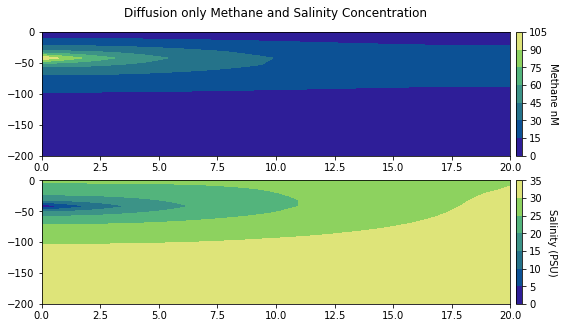

In [339]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,S[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Salinity (PSU)', rotation=270)
fig.suptitle('Diffusion only Methane and Salinity Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
#plt.savefig('SteadyDiffusion.pdf')

Text(0.45, 0.95, 'Steady vs Sinks Methane Concentration')

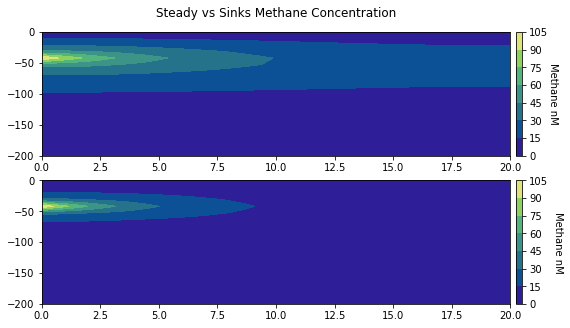

In [340]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,C[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Methane nM', rotation=270)
fig.suptitle('Steady vs Sinks Methane Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
#plt.savefig('fig.pdf')

Text(0.45, 0.95, 'Sinks Methane and Salinity Concentration')

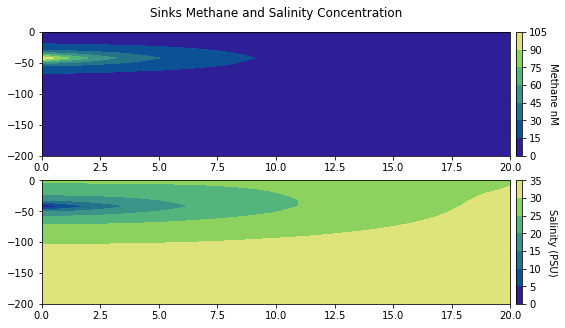

In [341]:
cmap=cmocean.cm.haline
fig, axs=plt.subplots(2,1,figsize=(10,5))
z = np.linspace(0,D,ngridz)
x = np.linspace(0,L/1e3,ngridx)
X,Z=np.meshgrid(x,z)

c1=axs[0].contourf(X,-Z,Cs[-1,:,:].T,cmap=cmap)
cb1=fig.colorbar(c1,ax=axs[0],pad=0.01)
cb1.ax.get_yaxis().labelpad = 10
cb1.set_label('Methane nM', rotation=270)
c2=axs[1].contourf(X,-Z,Ss[-1,:,:].T,cmap=cmap)
cb2=fig.colorbar(c2,ax=axs[1],pad=0.01)
cb2.ax.get_yaxis().labelpad = 15
cb2.set_label('Salinity (PSU)', rotation=270)
fig.suptitle('Sinks Methane and Salinity Concentration',y=0.95,x=0.45)
#fig.supxlabel('Distance from glacier (km)',x=0.45)
#fig.supylabel('Depth (m)',x=0.05)
#plt.savefig('SinksDiffusion.pdf')

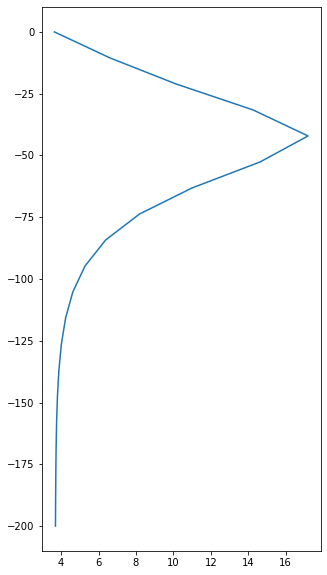

In [342]:
dz=D/(ngridz-1)
dx = L/(ngridx-1)
plt.figure(figsize=(5,10))
plt.plot(Cs[-1,20,:],-z)
#plt.axhline(y=-int(zz/dz)*dz)

In [343]:
# Create diagonal matrix:

v = np.ones(C.shape[1])
k = 0
v1 = np.ones(C.shape[1])*(-2)
k1 = 1
v2 = np.ones(C.shape[1])*(-1)
k2 = 2
operator_x = np.diag(v,k)
operator_x1 = np.diag(v1[0:-2],k1) # + np.diag(v2,k2)
print(operator_x)
print(operator_x1)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[ 0. -2.  0. ...  0.  0.  0.]
 [ 0.  0. -2. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -2.  0.]
 [ 0.  0.  0. ...  0.  0. -2.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [344]:
operator_x.shape

(50, 50)

In [345]:
zn = np.linspace(0,D,ngridz)
Sop = 33 + np.log(1e-3+zn/(D))
Sop

array([26.09224472, 30.07438278, 30.75816336, 31.16048667, 31.44659414,
       31.66879173, 31.85048215, 32.00418178, 32.13737475, 32.25489448,
       32.36004431, 32.45518208, 32.54204975, 32.62197085, 32.69597457,
       32.76487709, 32.82933654, 32.88989139, 32.94698778, 33.0009995 ])